In [1]:
import autoencoder.adversarial_cluster as aaec
import autoencoder.adversarial as aae
from matplotlib import pyplot as plt
%matplotlib inline

/home/cjw/anaconda3/envs/deep/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
esize = [(64,3), (128, 3), (256,3)]
dsize = list(reversed(esize))

params =dict()

params['nclusters'] = 20
params['width'] = 32
params['height'] = 32
params['nchannels'] = 4
params['channels'] = [0,1,3,4]
params['nepochs'] = 20
params['batchsize'] = 256
params['learning_rate'] = 0.0005
params['restore'] = False
params['latent_size'] = 256
params['enc_sizes'] = esize 
params['dec_sizes'] = dsize
params['droprate'] = 0.85
params['stdev'] = 0.04
params['denoise'] = False
params['slam'] = 0

datadir = "/media/cjw/Data/cyto/mmCompensatedTifs/"


In [ ]:
t = aae.training(params, datadir, "idec_try_3")
t.train(gpu=True, display=True, display_int=500, report_int=100, niterations=20001)

#aae.train(1001, display=True, display_int=500, report_int=50,title="Adver_try3")

Using data from: /media/cjw/Data/cyto/mmCompensatedTifs/
Saving checkpoints to: /media/cjw/Data/cyto/Checkpoints/2018-09-06-13-10-39_idec_try_3/checkpoint-2018-09-06-13-10-39/autoencoder-256x
Encoder True
Tensor("Placeholder:0", shape=(?, 32, 32, 4), dtype=float32) (?, 32, 32, 4)
isize:  4 32
dh0 (?, 32, 32, 4)
[<tf.Variable 'encoder/filter_00/kernel:0' shape=(3, 3, 4, 64) dtype=float32_ref>, <tf.Variable 'encoder/filter_00/bias:0' shape=(64,) dtype=float32_ref>, <tf.Variable 'encoder/filter_01/kernel:0' shape=(3, 3, 64, 128) dtype=float32_ref>, <tf.Variable 'encoder/filter_01/bias:0' shape=(128,) dtype=float32_ref>, <tf.Variable 'encoder/filter_02/kernel:0' shape=(3, 3, 128, 256) dtype=float32_ref>, <tf.Variable 'encoder/filter_02/bias:0' shape=(256,) dtype=float32_ref>, <tf.Variable 'encoder/latent_space/kernel:0' shape=(4096, 256) dtype=float32_ref>, <tf.Variable 'encoder/latent_space/bias:0' shape=(256,) dtype=float32_ref>, <tf.Variable 'decoder/dense/kernel:0' shape=(256, 4096) dt

In [ ]:
import autoencoder.cluster_layer as cl

In [ ]:
nc = t.params['nclusters']
m = t.params['latent_size']
Z = t.encoder.eval({t.images:t.get_batch(2400)}, session=t.sess)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=nc, n_init=20)
yp = kmeans.fit_predict(Z)
ypp = np.copy(yp)
c = cl.cluster_layer(nc, kmeans.cluster_centers_)
ca = c.apply(t.encoder)
#c.build((params['batchsize'], m))

(1, 256)


<IPython.core.display.Javascript object>


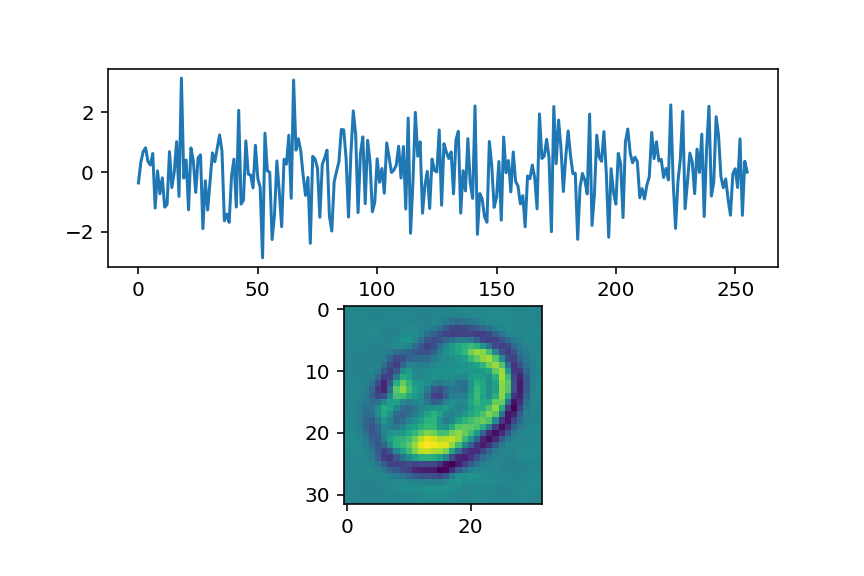

In [103]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook
z = t.encoder.eval({t.images:t.get_batch(2400)}, session=t.sess)
r = t.decoder.eval({t.encoder:z}, session=t.sess)
print(g.shape)
plt.subplot(2,1,1)
plt.plot(z[0])
plt.subplot(2,1,2)
plt.imshow(r[0,:,:,0])

In [106]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=16, n_init=20)
km = kmeans.fit_predict(z)
cx = kmeans.cluster_centers_




In [131]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=10, learning_rate=80, metric='cosine').fit_transform(z)

(2400, 2)


<IPython.core.display.Javascript object>


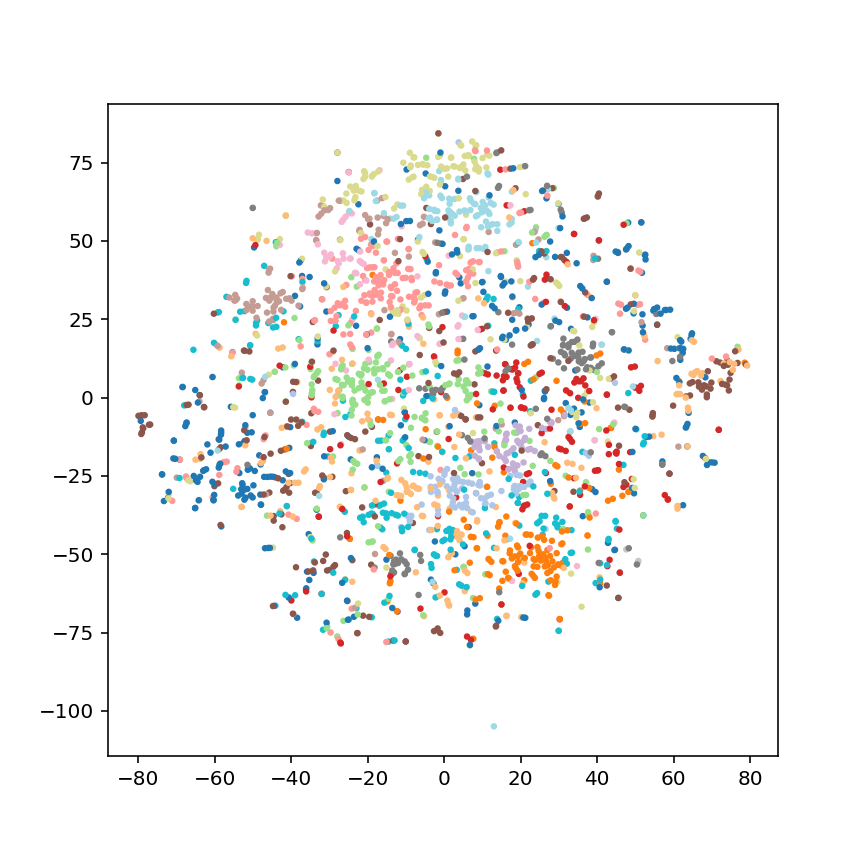

In [137]:
print(tsne.shape)
%matplotlib notebook
f = plt.figure(figsize=(6,6))
plt.scatter(tsne[:,0], tsne[:,1], 5, km, cmap='tab20_r')
plt.show()

In [159]:

t.saver.restore(t.sess,
                "/media/cjw/Data/cyto/Checkpoints/2018-09-05-10-58-21_idec_try_3/checkpoint-2018-09-05-10-58-21/autoencoder-256x-16000")

INFO:tensorflow:Restoring parameters from /media/cjw/Data/cyto/Checkpoints/2018-09-05-10-58-21_idec_try_3/checkpoint-2018-09-05-10-58-21/autoencoder-256x-16000


In [162]:
t.encoder

<tf.Tensor 'encoder/latent_space/BiasAdd:0' shape=(?, 256) dtype=float32>